## Задачи проекта
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

- Изучем данные и сделаем первую очистку

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Введение есть, отлично)

In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv('/datasets/games.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
dt.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
dt.isna().sum()
# Пропуск в имени и жанре, слишком мал, его просто удалим
# Оценки от критиков и юзеров заполним, проверим корреляцию, что сильнее влияет на высоту оценки жанр или платформа
# Рейтинг пока заполнять не буду, каноны выставления рейтинга сильно менялись в зависимости от года,
# посмотрим нужна ли нам будет эта информация

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
dt.columns = dt.columns.str.lower()  #сменил название столбцов на нижний регистр 

In [7]:
dt.loc[dt['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
dt = dt.dropna(subset = ['name'])
dt = dt.dropna(subset = ['year_of_release'])

In [9]:
# приведем 
dt['year_of_release'] = dt['year_of_release'].astype(int)

<div class="alert alert-info">
<b> 
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.</b>
</div>

In [10]:
dt.loc[dt['user_score'] == 'tbd', 'user_score'] = float('nan')
dt['user_score'] = dt['user_score'].astype(float)

In [11]:
dt['sum_sale'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales'] + dt['other_sales']

In [12]:
dt.info()
dt.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sale         16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [54]:
dt['rating'] = dt['rating'].fillna('Unknown')
dt['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

## Проведем исследовательский анализ данных

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

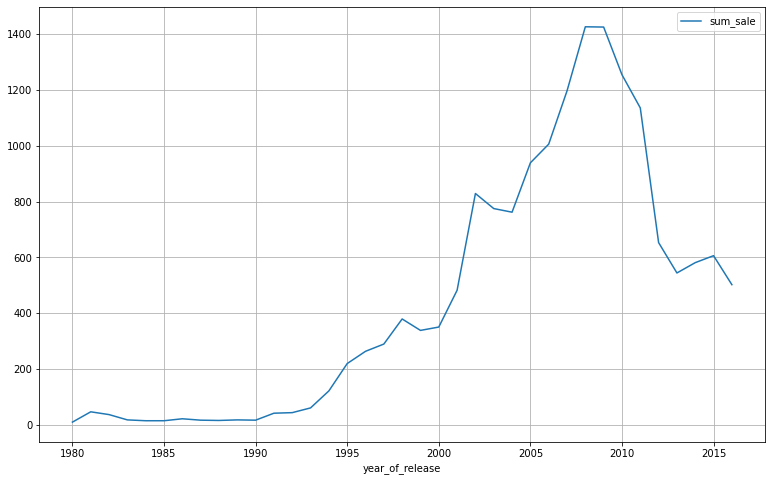

In [15]:
# Построим график зависимости количества игр от года выпуска
platform_sales = dt.pivot_table(index='year_of_release', values='sum_sale', aggfunc='count').plot(grid=True, figsize=(13, 8))

Судя по графику основной скачек начался с 2000 года, но тут не учитывается период производсва для АА класса нормой считается производство 2-4 года.
Кризис 2008 года сильно подкосил индустрию, нет денег на производство = нет новых игр 
Для потроянемя прогноза на 2017 год, берез срез в 4 года, больше нет смысла. 

In [16]:
new_dt = dt[dt['year_of_release'] > 2012].reset_index(drop=True)

new_dt.head(10)
#new_dt.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Unknown,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


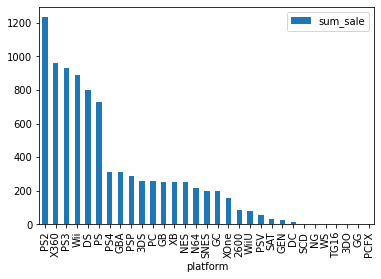

In [17]:
# Построим график зависимости продаж по платформам за все время
platform_sales_all = dt.pivot_table(index='platform', values='sum_sale', aggfunc='sum').sort_values('sum_sale', ascending=False).plot(kind='bar')

Оценним продажи по платформам и за одно высянить срок жизни разных платформ

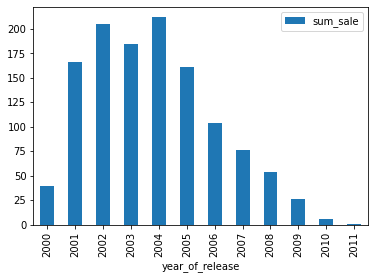

In [18]:
# Продажи по платформe PS2, распределение по годам.
dt.query('platform == "PS2"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

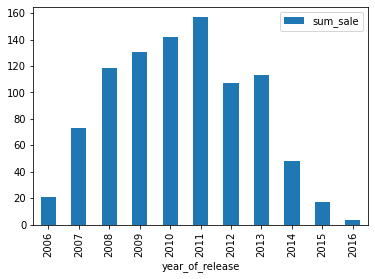

In [19]:
# Продажи по платформe PS3, распределение по годам.
dt.query('platform == "PS3"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

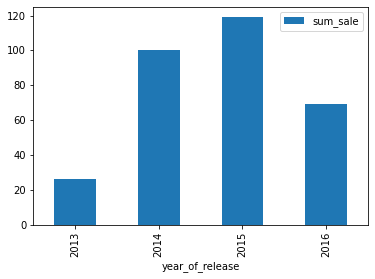

In [20]:
# Продажи по платформe PS4, распределение по годам.
dt.query('platform == "PS4"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

PS наиболее яркий пример смены покалений, 5-6 лет и новая консоль, при этом максимальный охват происходит на 3 год

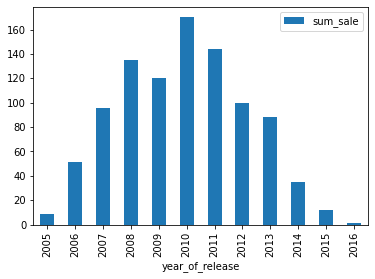

In [21]:
# Продажи по платформe x360, распределение по годам.
dt.query('platform == "X360"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

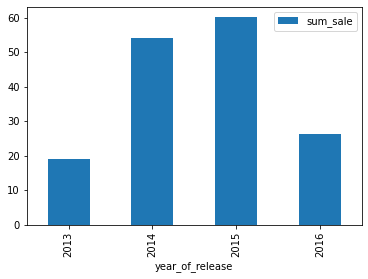

In [22]:
# Продажи по платформe Xone, распределение по годам.
dt.query('platform == "XOne"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

Xbox отстает но не сдается, более длинная жизнь в 2010 году почти догнал показатели ПС2 по каличеству игр,
что явно улучшело показатели платформы

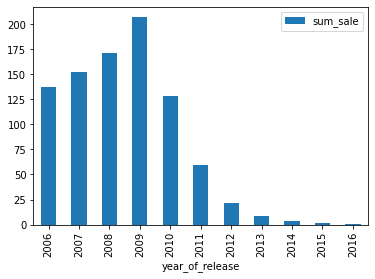

In [23]:
# Продажи по платформe Wii, распределение по годам.
dt.query('platform == "Wii"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='bar');

Родоначальник платфор, гордый самурай боролся как мог до 2010 года, следом полный уход производителей из системы

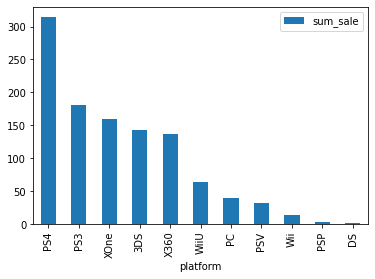

In [24]:
new_dt.pivot_table(index='platform', values='sum_sale', aggfunc='sum').sort_values('sum_sale', ascending=False).plot(kind='bar');

Взглянем на более важный показатель, продаже в разрезе платформ.
 - PS безусловный лидер, если прибавить сюда еще все поколения на которые продаются игры
 - X360 как более долго живушая платформа показывает хороший результат, но 5 месте уже виден приемник серии XOne
 - Wii суммарно выглядит неплохо со всеми смежными поклениями (WiiU, 3DS, DS), но 2016 будет закрыты продажи 3DS и WiiU, следвательно ее можно не брать в анализ
 - И завершает нашу великую тройку PC

Для анализа надо брать свежие платформы с оглядкой на прошлое поколение, так как их продажи и поддержка еще будет иметь значение.
Посмотрим кто ростет и кто падает

<AxesSubplot:xlabel='year_of_release'>

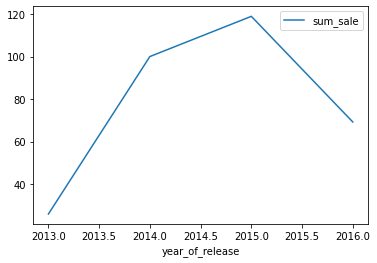

In [25]:
# Продажи по платформe PS4, распределение по годам.
new_dt.query('platform == "PS4"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_of_release'>

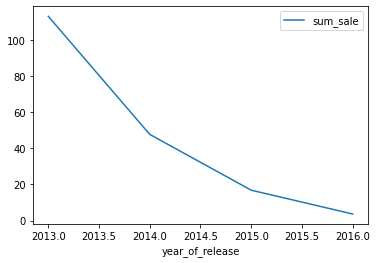

In [26]:
# Продажи по платформe PS3, распределение по годам.
new_dt.query('platform == "PS3"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_of_release'>

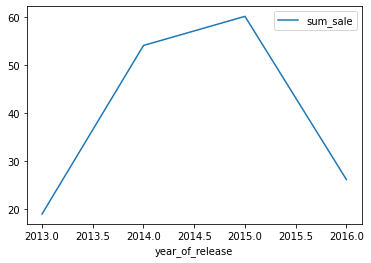

In [27]:
# Продажи по платформe XOne, распределение по годам.
new_dt.query('platform == "XOne"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_of_release'>

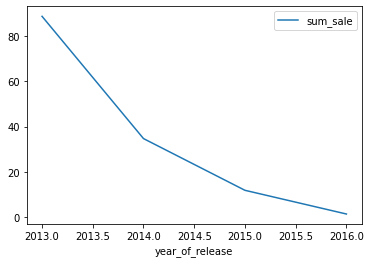

In [28]:
# Продажи по платформe x360, распределение по годам.
new_dt.query('platform == "X360"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_of_release'>

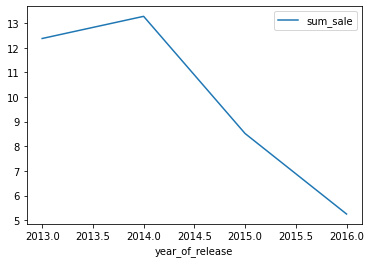

In [29]:
# Продажи по платформe PC, распределение по годам.
new_dt.query('platform == "PC"').pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum').plot(kind='line')

И так, что мы видим...
- Все падают.. 2014 год подкосил всех
- Преспективы есть только у PS4 и XOne
- Значит именно на этиъ платформах и сделуют строить прогнозы

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

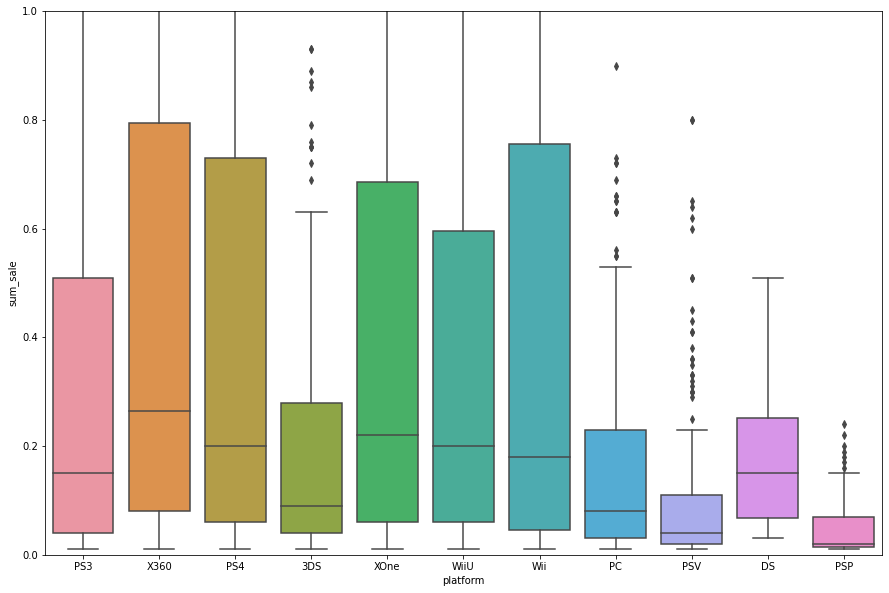

In [64]:
plt.figure(figsize=(15,10))
plt.ylim(0,1)
sns.boxplot(x='platform',y='sum_sale',data=new_dt);

In [32]:
new_dt.pivot_table(index = 'platform', values = ['sum_sale'],aggfunc = ['var', 'median', 'mean'])

,var,median,mean
,sum_sale,sum_sale,sum_sale
platform,,,
3DS,1.908119,0.090,0.472772
DS,0.029593,0.150,0.192500
PC,0.124118,0.080,0.208624
PS3,2.108128,0.150,0.525884
PS4,2.590350,0.200,0.801378
PSP,0.003572,0.020,0.052239
PSV,0.023660,0.040,0.092151
Wii,0.838016,0.180,0.593913


- Хороший показатель у медиан 0.3- 0.35 среди платформ Xbox, PS4 и WiiU
- Высота выбросоп показывает что отдельный игры могут сильно поднимать показатели в целом платформы.
- Размах у основных конкурентов очень похож, в диапазоне +1.5

Увы стория убила WiiU в том же 2016 году... но потом в 2017 Wii неожиданно ожила, но мы то этого не знаем!

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

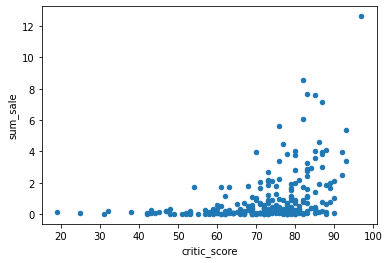

In [69]:
new_dt.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='sum_sale');

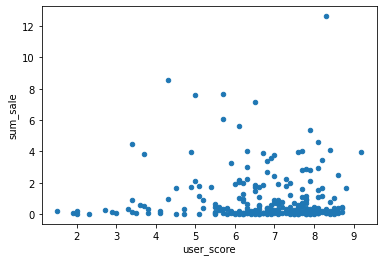

In [70]:
new_dt.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='user_score',y='sum_sale');

In [66]:
ps4_compare['sum_sale'].corr(ps4_compare['critic_score'])

0.406567902061781

In [36]:
ps4_compare['sum_sale'].corr(ps4_compare['user_score'])

-0.031957110204556376

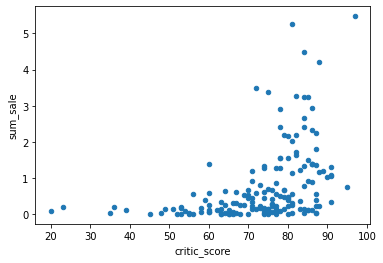

In [68]:
new_dt.query('platform=="XOne"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='sum_sale');

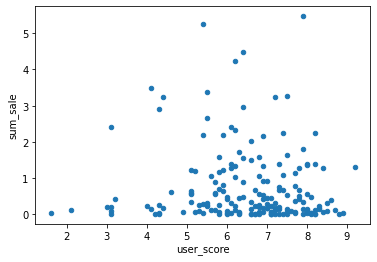

In [67]:
new_dt.query('platform=="XOne"').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='user_score',y='sum_sale');

In [39]:
xone_compare = new_dt.query('platform=="XOne"')
xone_compare['sum_sale'].corr(xone_compare['critic_score'])

0.41699832800840175

In [40]:
xone_compare['sum_sale'].corr(xone_compare['user_score'])

-0.06892505328279412

Вывод:
- Судя по графиками пользователи более склонные ставить низкие оценки в отличие от критиков, ОСОБЕННО на тайлы которые имеют высокие продажи
- Кореляция связи продажи и отзывов ниже проговых значений у ПС(0.406 и -0.031), у ХБох (0.416 и -0.068)
- я бы еще сказал что у ПС в целом более высокие оценки по играм, чем у ХБокс

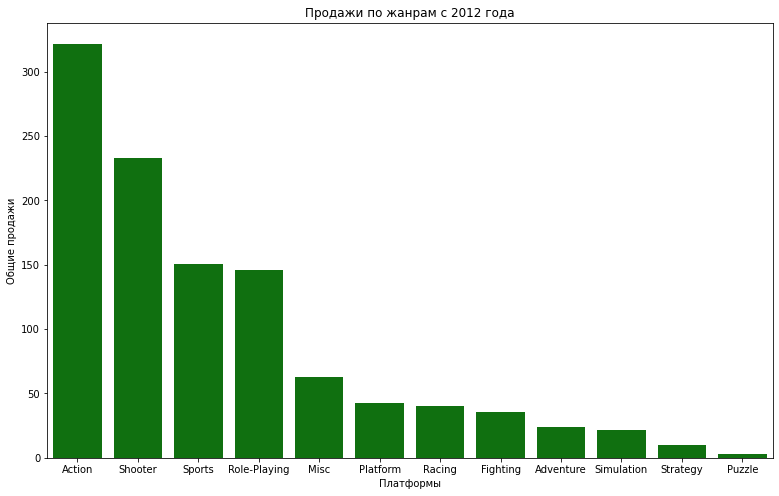

In [41]:
# Построим график распределения продаж по жанрам игр
plt.figure(figsize=(13, 8))
platform_sales_fresh = new_dt.pivot_table(index='genre', values='sum_sale', aggfunc='sum').sort_values('sum_sale', ascending=False)
(sns.barplot(data = platform_sales_fresh, x = platform_sales_fresh.index, y = 'sum_sale', color = 'green')
    .set(title = 'Продажи по жанрам c 2012 года', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Было бы не лишним взглянуть на медиану

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


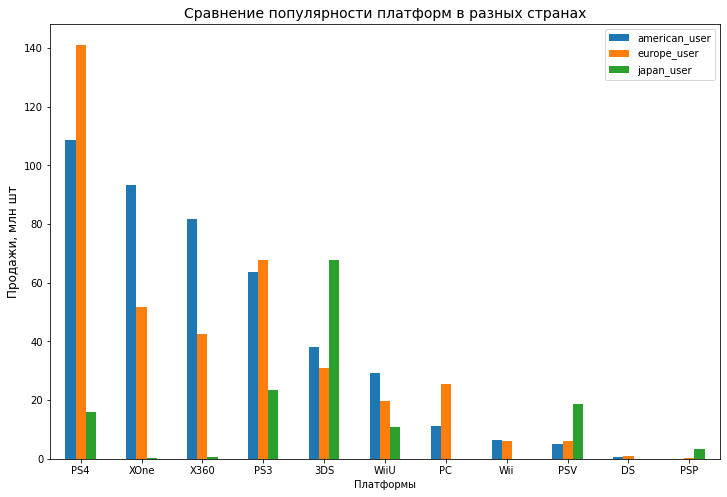

In [42]:
# 
na_platf = new_dt.groupby(['platform'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по платформам
eu_platf = new_dt.groupby(['platform'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по платформам
jp_platf = new_dt.groupby(['platform'])['jp_sales'].agg(['sum'])
# объединяем Series
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['platform', 'american_user', 'europe_user', 'japan_user']
users_platf = users_platf.sort_values(by='american_user', ascending=False)
# строим bar plot
users_platf.plot.bar(x="platform", rot=0, figsize =(12, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=14)
plt.xlabel('Платформы', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

Выводы:
- Видно серьезное разделение рынков по платформам (PS- это рынки европы и азии)и (Xbox - это рынок Северной Америки и Европы)
- Так же видно что Азиатский рынок сильно отличается от Европы и Америки (большое наличие 3DS, WiiU, PSV, PSP)

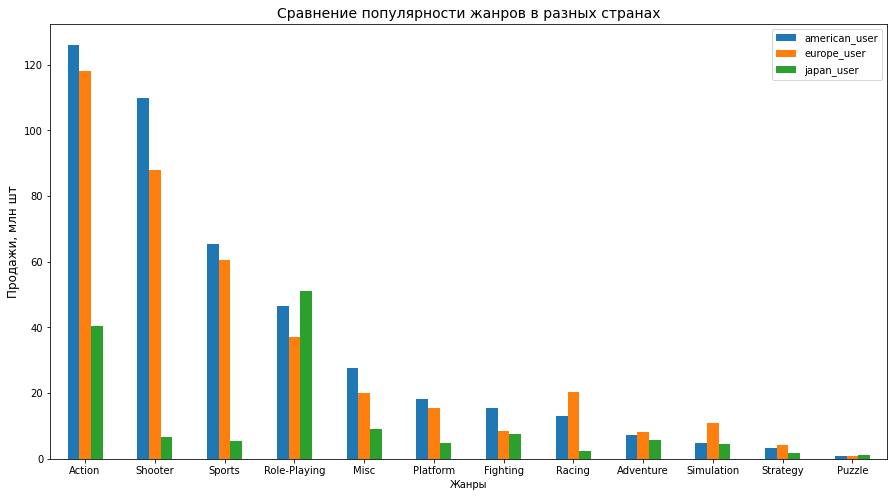

In [43]:
na_genre = new_dt.groupby(['genre'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по жанрам
eu_genre = new_dt.groupby(['genre'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по жанрам
jp_genre = new_dt.groupby(['genre'])['jp_sales'].agg(['sum'])
# объединяем Series
users_genre = pd.concat([na_genre, eu_genre, jp_genre], axis=1).reset_index()
users_genre.columns = ['genre', 'american_user', 'europe_user', 'japan_user']
users_genre = users_genre.sort_values(by='american_user', ascending=False)
# строим bar plot
users_genre.plot.bar(x="genre", rot=0, figsize =(15, 8))
plt.title('Сравнение популярности жанров в разных странах', fontsize=14)
plt.xlabel('Жанры', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

Выводы:
- Action & Shooter доминуреут на рынках Европы и Америки ( 1 и 2 ТОП)
- На 3 месте у жанра Sport , и опять рынки Европы и Америки
- Неожиданно ТОП 1 Азии и ТОП 4, это Role-playing 
- Замыкает ТОП 5, Музыкальные с присутствием на всех рынках

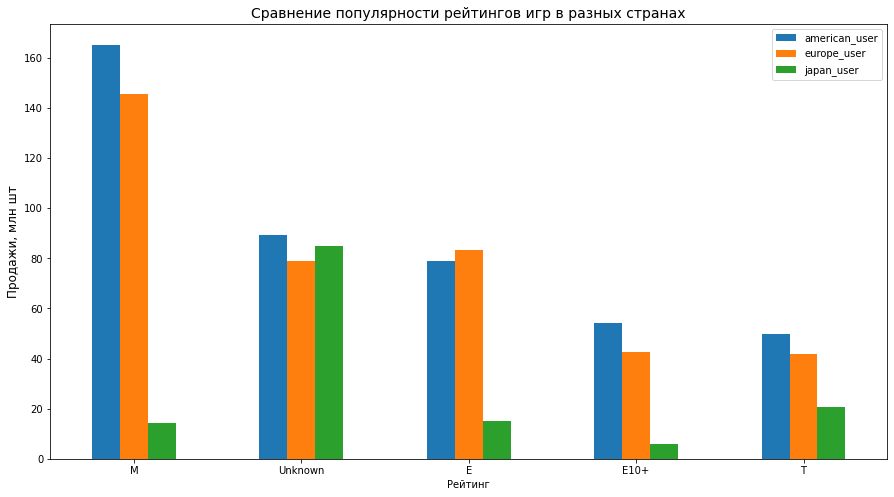

In [44]:
na_rating = new_dt.groupby(['rating'])['na_sales'].agg(['sum'])
# сумма проданных копий для Европы по рейтингу
eu_rating = new_dt.groupby(['rating'])['eu_sales'].agg(['sum'])
# сумма проданных копий для Японии по рейтингу
jp_rating = new_dt.groupby(['rating'])['jp_sales'].agg(['sum'])
# объединяем Series 
users_rat = pd.concat([na_rating, eu_rating, jp_rating], axis=1).reset_index()
users_rat.columns = ['rating', 'american_user', 'europe_user', 'japan_user']
users_rat = users_rat.sort_values(by='american_user', ascending=False)
users_rat 
# строим bar plot
users_rat.plot.bar(x="rating", rot=0, figsize =(15, 8))
plt.title('Сравнение популярности рейтингов игр в разных странах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

Легенда:
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам» от 13 лет
 - «M» («Mature») — «Для взрослых» от 17 лет
 - «E» («Everyone») — «Для всех» от 6 лет

Рейтнг игр показывает нам основных потребителей контента:
  - ТОП это игроки 17+ в Европе и Америке
  - "Е" 2 наиболее популярный рейтинг
  - Интересно что "Т" этот рейтинг наиболее распростанен в Азиатском регионе
  
  - Заглушка показала очень интересную однородность в рынках ( интересно это какая то ошибка в данных или у этого жнра просто нет рейтинга) Я бы даже предположил что это возможно Роле_Плей жанр )))

### Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [45]:
import numpy as np
from scipy import stats as st

In [46]:
clean_dt = new_dt.dropna(subset = ['user_score'])

In [47]:
results = st.ttest_ind(clean_dt.query('platform == "XOne"')['user_score'], clean_dt.query('platform == "PC"')['user_score'])

alpha = .03
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Кореляция не показала зависимости что рейтинг разниться между пользователями Xbox One и PC. В целом если знать что это по суди идыная платформа и единая компания, было бы странно найти здесь серьзное отличие.

НО как и до этого показала зависимость продаж от рейтинга, рейтинг нужен только как повод упоминания ))

#### Средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [48]:
results = st.ttest_ind(clean_dt.query('genre == "Action"')['user_score'], clean_dt.query('genre == "Sports"')['user_score'])

alpha = .03 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [49]:
clean_dt.query('genre == "Sports"')['name'].count()

160

In [50]:
clean_dt.query('genre == "Action"')['name'].count()

389

Средние пользовательские рейтинги жанров Action и Sports различаются.
НО есть 2 но...
- Выборка по Action в 2 раза больше(а по закону больших числе, чем больше выборка тем более точнее среднее)
- Остаеться только радоваться те тем пользователей которыее более удовлетворены продуктом

## Вывод:

<div style="alert alert-success">
<br /> 
<font size="3", color = "black">
<br /> 
Строя прогноз на продажи на 2017 год, мои рекомендации такие:
- Тенденция на синжения продаж сохранится (Но основные платформы сохранять или даже приумножат свою прибыль XBox & PS)
- В целом отзывы критиков и пользователей, не сильно влияют на продажи
- Определенная платформа сильно разделяет рынки сбыта
- Самые популярные жанры имеют почти равный интерес у пользователей (Action, Shooter, Sports), кроме Азиатского рынка (Role-Playing)
- И выбирая игру для разработки, нужно учитывать ее рейтинг "Mature" имеет большее число продаж, а "Teen" лучший аланс среди регионов
    
- В целом выводы остались такими же, но Unknown рейтинг немного подлил вопросов.
- Если не знать что Wii во всю разрабатывает новую консоль, мои выводы остаются прежними ХБох + ПС4 и жанр Action будет в топе) 